In [ ]:
from envs.SingleAgent.mine_toy import EpMineEnv

PATH_DRL = r"E:\filestorage\github\UCASRL2024SP\EpMineEnv\EpMineEnv-main\envs\SingleAgent\MineField_Windows-0510-random\drl.exe"

env = EpMineEnv(
        file_name=PATH_DRL,
        no_graph=True,
        max_episode_steps=1000,
        only_image=True,
        only_state=False,
        time_scale=200,
    )

In [ ]:
env.action_space

In [ ]:
from stable_baselines3 import PPO

model = PPO(
    "CnnPolicy",
    env,
    verbose=1,
)

In [ ]:
obs = env.reset()
obs.shape

In [ ]:
a, _ = model.predict(obs)
a

In [ ]:
len(env.step(a))

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def random_action():
    """
    返回一个三维的随机动作，最大值分别在[-10,10], [-10,10], [-3,3]之间
    """
    return np.array([np.random.uniform(-10, 10), np.random.uniform(-10, 10), np.random.uniform(-3, 3)])

In [ ]:
from tqdm import trange

In [ ]:
rewards = []
dist_rewards = []
yaw_rewards = []
pitch_rewards = []
angle_rewards = []
obs = env.reset()
for _ in trange(10000):
    a = random_action()
    obs, reward, done, info = env.step(a)
    dist_rewards.append(env.dist_reward)
    yaw_rewards.append(env.yaw_reward)
    pitch_rewards.append(env.pitch_reward)
    angle_rewards.append(env.angle_reward)
    rewards.append(reward)

In [ ]:
import seaborn as sns

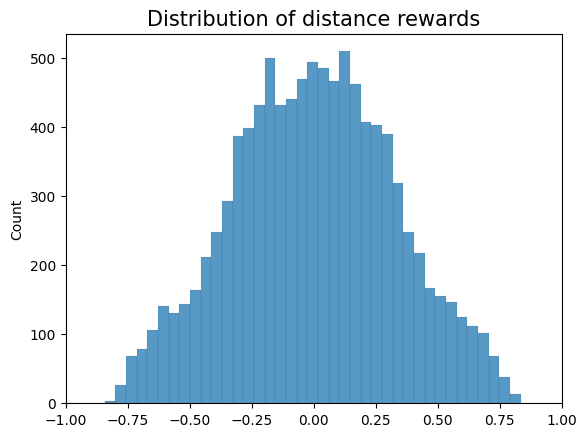

In [13]:
sns.histplot(dist_rewards)
plt.title("Distribution of distance rewards", fontsize=15)
plt.xlim(-1, 1)
plt.savefig("figure/distance_rewards.png", dpi=300, bbox_inches="tight")

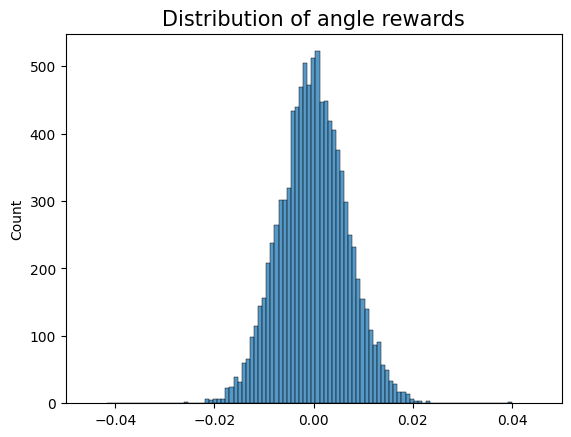

In [14]:
sns.histplot(angle_rewards)
plt.title("Distribution of angle rewards", fontsize=15)
plt.xlim(-0.05, 0.05)
plt.savefig("figure/angle_rewards.png", dpi=300, bbox_inches="tight")

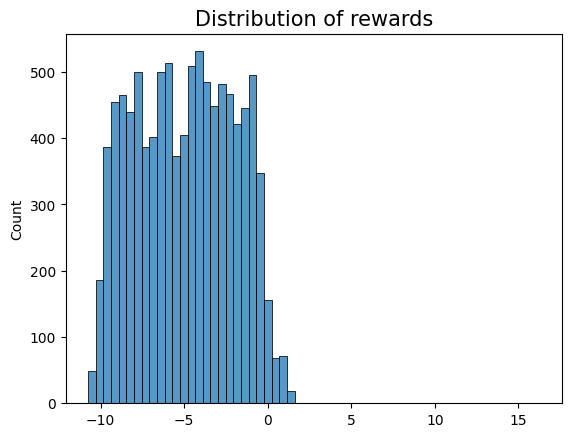

In [18]:
sns.histplot(rewards)
plt.title("Distribution of rewards", fontsize=15)
# plt.xlim(-2, 2)
plt.savefig("figure/rewards.png", dpi=300, bbox_inches="tight")

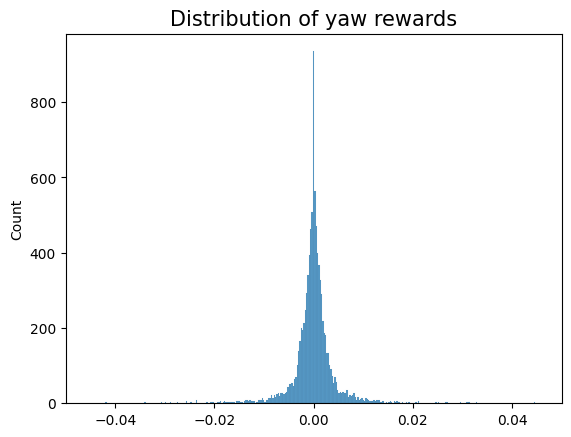

In [16]:
sns.histplot(yaw_rewards)
plt.title("Distribution of yaw rewards", fontsize=15)
plt.xlim(-0.05, 0.05)
plt.savefig("figure/yaw_rewards.png", dpi=300, bbox_inches="tight")

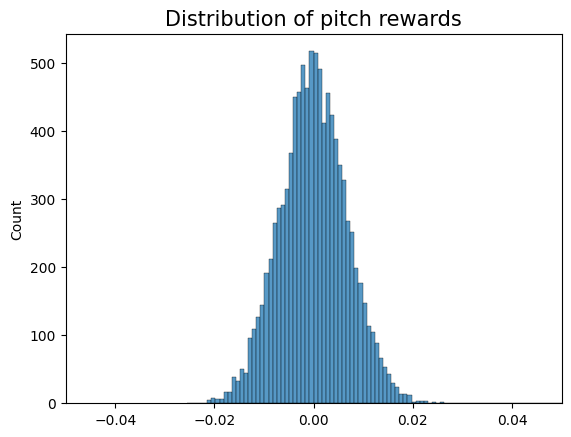

In [17]:
sns.histplot(pitch_rewards)
plt.title("Distribution of pitch rewards", fontsize=15)
plt.xlim(-0.05, 0.05)
plt.savefig("figure/pitch_rewards.png", dpi=300, bbox_inches="tight")